In [310]:
import pandas as pd
import plotly.express as px

# Calcular estatísticas descritivas (média, mediana, desvio padrão).

In [311]:
csv_path = "data_root/earthquakes.csv"
df = pd.read_csv(csv_path)
df.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [312]:
df_dropped = df.drop(columns=["time","updated", "url", "detailUrl", "code", "ids", "types"])
df_dropped.head()

,id,magnitude,type,title,date,felt,cdi,mmi,alert,status,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1893,6,5,green,reviewed,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,2042,6,5,green,reviewed,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1580,4,4,NaN,reviewed,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,5,3,4,green,reviewed,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,4,3,4,green,reviewed,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [313]:
# Média
df_media = df_dropped["magnitude"].mean()
print(f"A média da magnitude é: {df_media:.2f}")

A média da magnitude é: 4.86


In [314]:
# Mediana
df_mediana = df_dropped["magnitude"].median()
print(f"A mediana da magnitude é: {df_mediana:.2f}")

A mediana da magnitude é: 5.30


In [315]:
# Desvio Padrão
df_desvio_padrao = df_dropped["magnitude"].std()
print(f"O Desvio Padrão da magnitude é: {df_desvio_padrao:.2f}")

O Desvio Padrão da magnitude é: 1.05


In [316]:
# criando novas colunas para separar data e hora
df_dropped['data'] = df_dropped['date'].str.split('T').str[0]
df_dropped['hora'] = df_dropped['date'].str.split('T').str[1]

# Converter a hora para dattime epara facilitar manipulação
df_dropped['hora'] = pd.to_datetime(df_dropped['hora'], format='%H:%M:%S').dt.time

# Função para categorizar o período do dia
def categorizar_periodo(hora):
    if 5 <= hora.hour < 12:
        return 'Manhã'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Aplicar a função e criar a nova coluna 'periodo'
df_dropped['periodo'] = df_dropped['hora'].apply(categorizar_periodo)

#print(df_dropped)

In [317]:
# Converter para formato datetime
df_dropped['data'] = pd.to_datetime(df_dropped['data'])


df_agrupado_data = df_dropped.groupby(df_dropped['data'].dt.date).size().reset_index(name='quantidade')

fig_por_dia = px.line(df_agrupado_data, x='data', y='quantidade', title='Eventos por Dia - Linha', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_dia.show()


fig_por_mes = px.histogram(df_agrupado_data, x='data', y='quantidade', title='Eventos por Mes - Histograma', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_mes.update_layout(bargap=0.1)  
fig_por_mes.show()

In [318]:

df_terremotos_por_continente = df_dropped.groupby('continent').size().reset_index(name='quantidade')


fig_bar = px.bar(
    df_terremotos_por_continente,
    x='continent',
    y='quantidade',
    labels={
        'continent': 'Continente',
        'quantidade': 'Quantidade de Eventos'
    },
    title='Quantidade de Eventos por Continente',
    color='continent'
)


fig_bar.show()

In [319]:
# Filtrar magnitudes maiores que 5.3
maiores_terremotos = df[df['magnitude'] > 5.3]

# Agrupar por continente e pegar as maiores magnitudes
df_max_magnitude = maiores_terremotos.groupby('continent')['magnitude'].max().reset_index()


fig_bar = px.bar(
    df_max_magnitude,
    x='continent',
    y='magnitude',
    labels={
        'continent': 'Continente',
        'magnitude': 'Maior Magnitude'
    },
    title='Maiores Magnitudes por Continente, acima de 5.3 (media) ',
    color='continent'
)


fig_bar.show()

In [320]:
frequencia_por_continente = maiores_terremotos['continent'].value_counts().reset_index()
frequencia_por_continente.columns = ['continentes', 'frequencia'] 

fig_mnaiores_continentes = px.bar(
    frequencia_por_continente,
    x='continentes',
    y='frequencia',
    labels={
        'continentes': 'Continente',
        'frequencia': 'Quantidade de Eventos'
    },
    title='Frequência de Terremotos Maiores que 5.3 por Continente',
    text='frequencia',
    color='continentes'
)

fig_mnaiores_continentes.show()

In [321]:
fig_scatter = px.scatter(
    df_dropped,
    x='cdi',  
    y='magnitude', 
    labels={
        'cdi': 'Magnitude sentida segundo relatos',
        'magnitude': 'Magnitude'
    },
    title='Dispersão de Magnitudes de Terremotos por Continente',
    color='continent', 
    size='magnitude', 
    hover_name='continent',  
    size_max=20 
)

fig_scatter.show()

In [322]:
colunas_selecionadas = [
    'magnitude', 'data', 'hora', 'periodo', 'subnational', 'city', 'depth', 'felt', 'continent', 'latitude', 'longitude', 
    'mmi', 'cdi'
]

df_selecionado = df_dropped[colunas_selecionadas]
df_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   magnitude    1137 non-null   float64       
 1   data         1137 non-null   datetime64[ns]
 2   hora         1137 non-null   object        
 3   periodo      1137 non-null   object        
 4   subnational  716 non-null    object        
 5   city         674 non-null    object        
 6   depth        1137 non-null   float64       
 7   felt         1137 non-null   int64         
 8   continent    867 non-null    object        
 9   latitude     1137 non-null   float64       
 10  longitude    1137 non-null   float64       
 11  mmi          1137 non-null   int64         
 12  cdi          1137 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 115.6+ KB


In [323]:
sem_nulos = df_selecionado.dropna(subset=['city', 'continent', 'subnational'])

sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 1136
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   magnitude    664 non-null    float64       
 1   data         664 non-null    datetime64[ns]
 2   hora         664 non-null    object        
 3   periodo      664 non-null    object        
 4   subnational  664 non-null    object        
 5   city         664 non-null    object        
 6   depth        664 non-null    float64       
 7   felt         664 non-null    int64         
 8   continent    664 non-null    object        
 9   latitude     664 non-null    float64       
 10  longitude    664 non-null    float64       
 11  mmi          664 non-null    int64         
 12  cdi          664 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 72.6+ KB


In [324]:
# Calcular os quartis Q1 e Q3 para a coluna 'depth'
Q1_depth = sem_nulos['depth'].quantile(0.25)
Q3_depth = sem_nulos['depth'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'depth'
IQR_depth = Q3_depth - Q1_depth

# Calcular os limites inferior e superior (fences) para 'depth'
limite_inferior_depth = Q1_depth - 1.5 * IQR_depth
limite_superior_depth = Q3_depth + 1.5 * IQR_depth

# Remover outliers com base nos limites para 'depth'
sem_nulos = sem_nulos[(sem_nulos['depth'] >= limite_inferior_depth) & (sem_nulos['depth'] <= limite_superior_depth)]

# Calcular os quartis Q1 e Q3 para a coluna 'mmi'
Q1_mmi = sem_nulos['mmi'].quantile(0.25)
Q3_mmi = sem_nulos['mmi'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'mmi'
IQR_mmi = Q3_mmi - Q1_mmi

# Calcular os limites inferior e superior (fences) para 'mmi'
limite_inferior_mmi = Q1_mmi - 1.5 * IQR_mmi
limite_superior_mmi = Q3_mmi + 1.5 * IQR_mmi

# Remover outliers com base nos limites para 'mmi'
sem_nulos = sem_nulos[(sem_nulos['mmi'] >= limite_inferior_mmi) & (sem_nulos['mmi'] <= limite_superior_mmi)]

# Calcular os quartis Q1 e Q3 para a coluna 'magnitude'
Q1_magnitude = sem_nulos['magnitude'].quantile(0.25)
Q3_magnitude = sem_nulos['magnitude'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'magnitude'
IQR_magnitude = Q3_magnitude - Q1_magnitude

# Calcular os limites inferior e superior (fences) para 'magnitude'
limite_inferior_magnitude = Q1_magnitude - 1.5 * IQR_magnitude
limite_superior_magnitude = Q3_magnitude + 1.5 * IQR_magnitude

# Remover outliers com base nos limites para 'magnitude'
sem_nulos = sem_nulos[(sem_nulos['magnitude'] >= limite_inferior_magnitude) & (sem_nulos['magnitude'] <= limite_superior_magnitude)]


In [325]:
# verificando outliers
df_meltada_2 = pd.melt(
    sem_nulos,
    value_vars=['magnitude', 'cdi', 'mmi'],  
    var_name='medida', 
    value_name='valor'  
)

fig_analise_outliers_s_nulo = px.box(data_frame=df_meltada_2, y='valor', color='medida',  labels={'valor': 'Valor', 'medida': 'Métrica'}, title='Validando valores por metricas')
fig_analise_outliers_s_nulo.show()

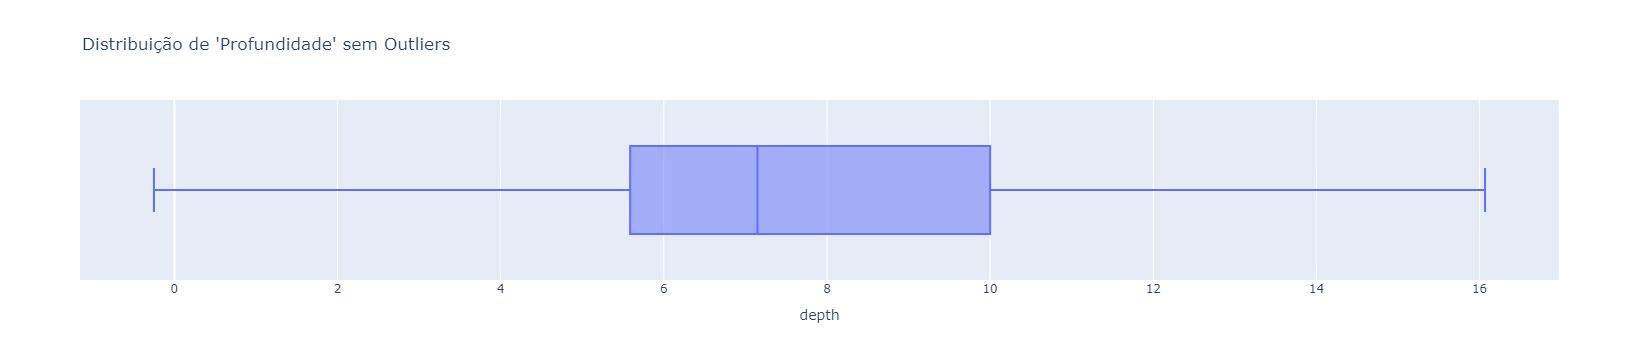

In [336]:
df_sem_outliers = sem_nulos[(sem_nulos['depth'] >= limite_inferior) & (sem_nulos['depth'] <= limite_superior)]
deth_outlier = px.box(df_sem_outliers, x='depth', title="Distribuição de 'Profundidade' sem Outliers")
grafico_deth_outlier.show()

In [333]:
sem_nulos_e_outlier = sem_outlier_detalhado.copy()

sem_nulos_e_outlier.loc[:, 'depth'] = sem_outlier_detalhado['depth'].copy()

sem_nulos_e_outlier.dropna(inplace=True)

sem_nulos_e_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 1135
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   magnitude    503 non-null    float64       
 1   data         503 non-null    datetime64[ns]
 2   hora         503 non-null    object        
 3   periodo      503 non-null    object        
 4   subnational  503 non-null    object        
 5   city         503 non-null    object        
 6   depth        503 non-null    float64       
 7   felt         503 non-null    int64         
 8   continent    503 non-null    object        
 9   latitude     503 non-null    float64       
 10  longitude    503 non-null    float64       
 11  mmi          503 non-null    int64         
 12  cdi          503 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 55.0+ KB


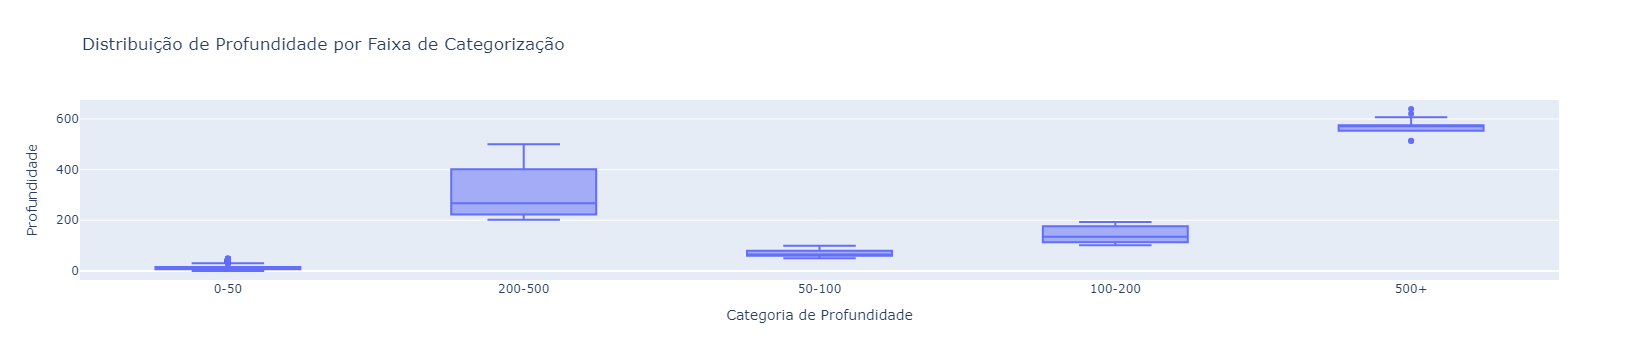

In [350]:
min_depth = -0.24
max_depth = 639.503

bins = [min_depth, 50, 100, 200, 500, max_depth]
labels = ['0-50', '50-100', '100-200', '200-500', '500+']

df_selecionado.loc[:, 'depth_categoria'] = pd.cut(df_selecionado['depth'], bins=bins, labels=labels)

fig = px.box(
    df_selecionado, 
    x='depth_categoria',  # Categorização da profundidade
    y='depth',  # Coluna de profundidade para a análise
    labels={'depth': 'Profundidade', 'depth_categoria': 'Categoria de Profundidade'},
    title='Distribuição de Profundidade por Faixa de Categorização'
)

fig.show()
